In [1]:
# options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

### 가설 검정

### 카이제곱 검정
: 두 범주형 변수(연속형은 못씀)가 서로 상관이있는지 판단하는 통계적 검정 방법.
예) 학력, 성별, 직업의 만족도

### child별 장난감 보유 현황
- 귀무가설 : child1과 child2의 장난감 보유수에 대한 만족도는 차이가 없다
- 대립가설 : chile1과 chile2의 장난감 보유수에 대한 만족도의 차이가 있다.

In [2]:
child1 <- c(5,11,1)
child2 <- c(4,7,3)

#분석을 위해 데이터 합치기
Toy <- cbind(child1,child2)
Toy

child1,child2
5,4
11,7
1,3


In [3]:
#행의 이름
rownames(Toy) <- c('car','truck','doll')
Toy

,child1,child2
car,5,4
truck,11,7
doll,1,3


In [4]:
#카이제곱 검정
chisq.test(Toy)

Warning message in chisq.test(Toy):
“카이제곱 approximation은 정확하지 않을수도 있습니다”



	Pearson's Chi-squared test

data:  Toy
X-squared = 1.7258, df = 2, p-value = 0.4219


### 결론
- p-value = 0.4219>0.05(유의 수준 : 95%의 신뢰구간) --> 귀무가설(0.05보다 훨씬크면 귀무가설)
- chile1과 child2의 데이터는 통계적으로 큰 차이가 없다

---
p-value는 0에 가까울 수록 좋다.
미리 정해진 유의수준(일반적으로 0.05)보다 낮으면 대립가설을 채택하고 크면 귀무가설을 채택한다.
df=2 : 검정에서 사용된 자유도는 2이다
카이제곱 검정의 자유도는 3개의 범주가 있다면 자유도는 3-1=2가 됩니다.

### Warning
데이터량이 적은 경우 발생
--> 피셔검정 :  표본수가 적거나 데이터의 분포가 치우친 경우


In [5]:
#피셔 검정
fisher.test(Toy)


	Fisher's Exact Test for Count Data

data:  Toy
p-value = 0.5165
alternative hypothesis: two.sided


p-value = 0.5165 > 0.05 -> 귀무가설
대립가설: 대립가설은 'two.sided'로 살정되어 있어 양측검정을 나타낸다.

In [6]:
#상관계수
cor(child1,child2)  ## 0.98 = 차이가 거의없다.

[1] 0.9862414

# T검정

In [ ]:
#귀무가설 :  건전지의 수명을 1000시간이다
#대립가설 :  건전지의 수명을 1000시간이 아니다.

In [8]:
# 데이터의 분포가 정규분포인지 확인( shapiro-wilk 검점)
# 귀무가설 :  자료가 정규분포에 따른다.
# 대립가설 :  자료가 정규분포를 따르지 않는다.

bat <- c(980,1008,968,1032,1012,1002,996,1017)
shapiro.test(bat)


	Shapiro-Wilk normality test

data:  bat
W = 0.97706, p-value = 0.9469


p-value = 0.9469 >0.05 --> 귀무가설
W = 0.97706값이 1에 가까울수록 정규성에 가깝다.

In [9]:
# t-검정
t.test(bat,mu=1000,alternative = "two.sided")

#mu = 비교하는 대상의 평균(1000시간이라고 하는걸 검증이니)
#alternative
# - two.sided : 데이터가 평균과 다르다.
# - greater : 데이터가 평균보다 크다.
# - less : 데이터가 평균보다 작다.


	One Sample t-test

data:  bat
t = 0.25891, df = 7, p-value = 0.8032
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  984.7508 1018.9992
sample estimates:
mean of x 
 1001.875 


p-value = 0.8032 >0.05 -> 귀무가설

no,score
<int>,<int>
1,58
2,49
3,39
4,99
5,32
6,88
7,62
8,30
9,55


[1] 56.17647

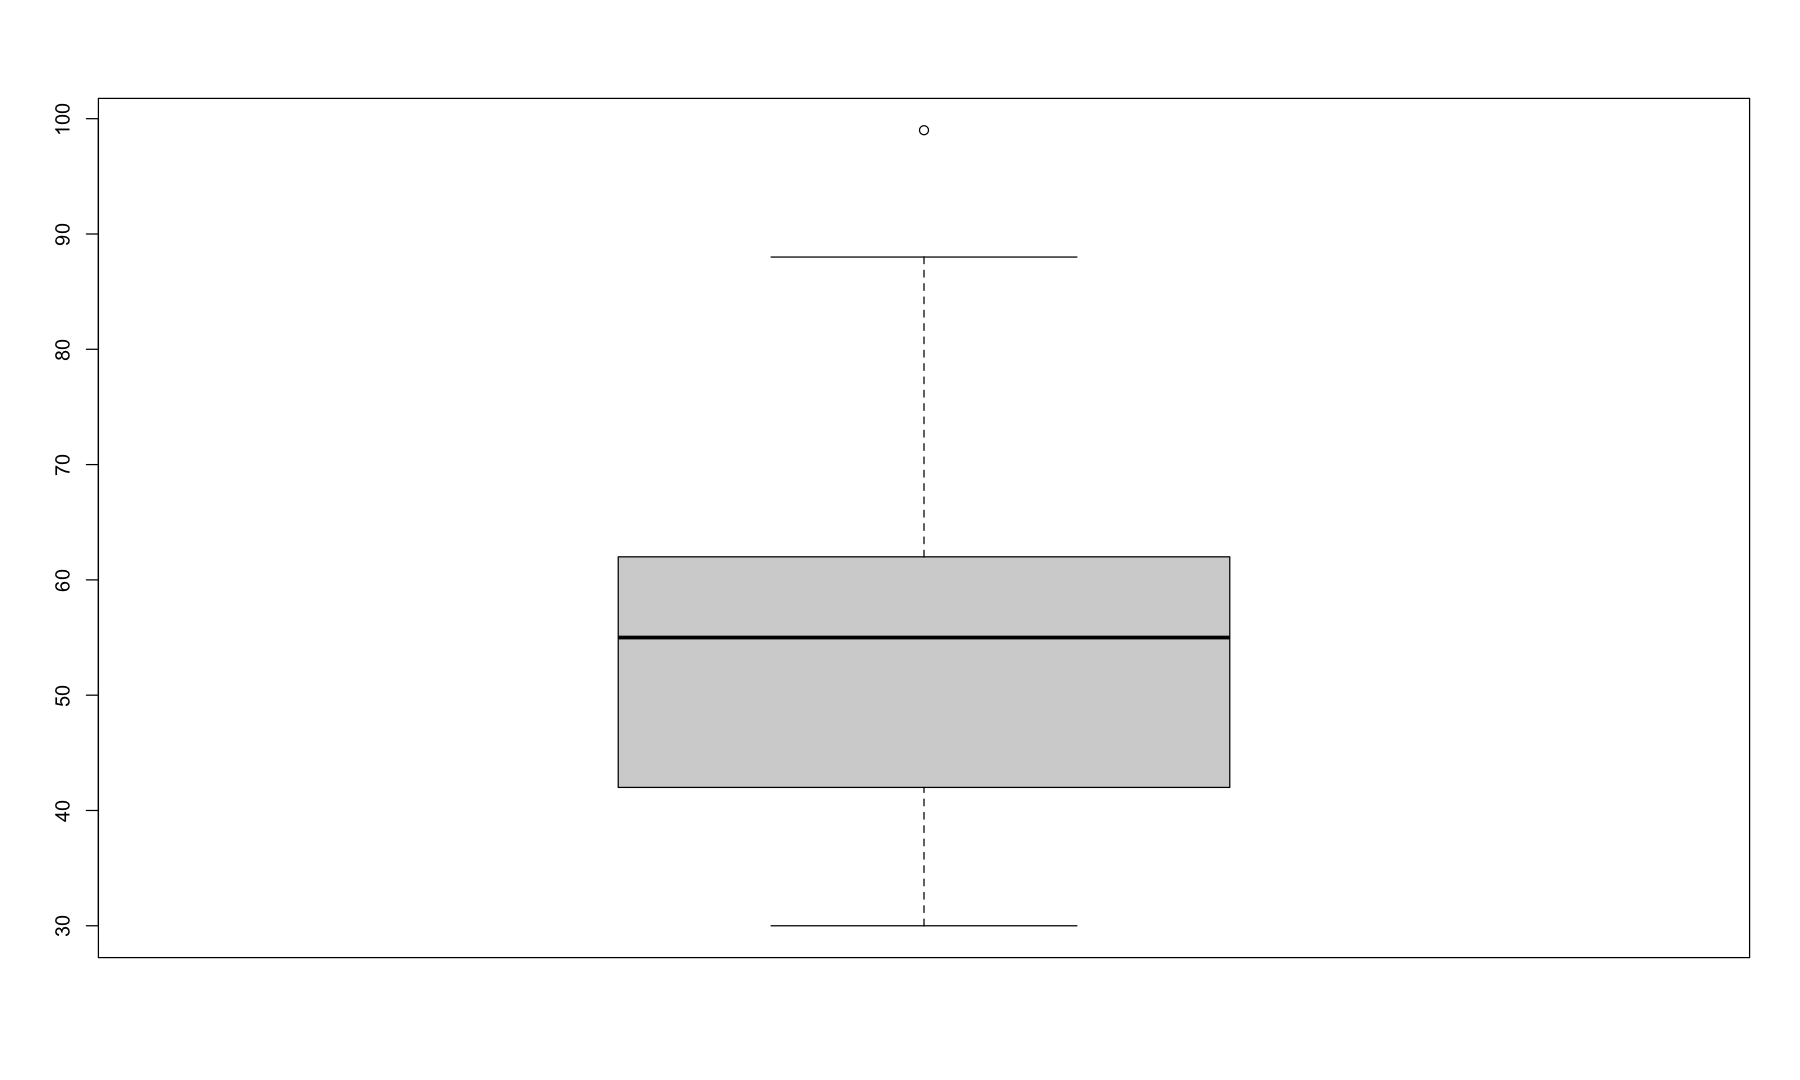

In [25]:
# 어떤 학급의 수학 점수 평균 : 55점
# 0교시 수업을 한 후에 학생들의 성적이 올랐을까?
# 귀무가설 : 성적이오르지 않았다.  귀무가설 :  하나마나, 즉 변화가없다= 성적이 오르지않고 그대로다.
# 대립가설: 성적이 올랐다.

exam <- read.csv("./Data/exam.csv")

exam
mean(exam$score)

boxplot(exam$score)


	Shapiro-Wilk normality test

data:  exam$score
W = 0.91143, p-value = 0.1058



	One Sample t-test

data:  exam$score
t = 0.24546, df = 16, p-value = 0.4046
alternative hypothesis: true mean is greater than 55
95 percent confidence interval:
 47.80855      Inf
sample estimates:
mean of x 
 56.17647 


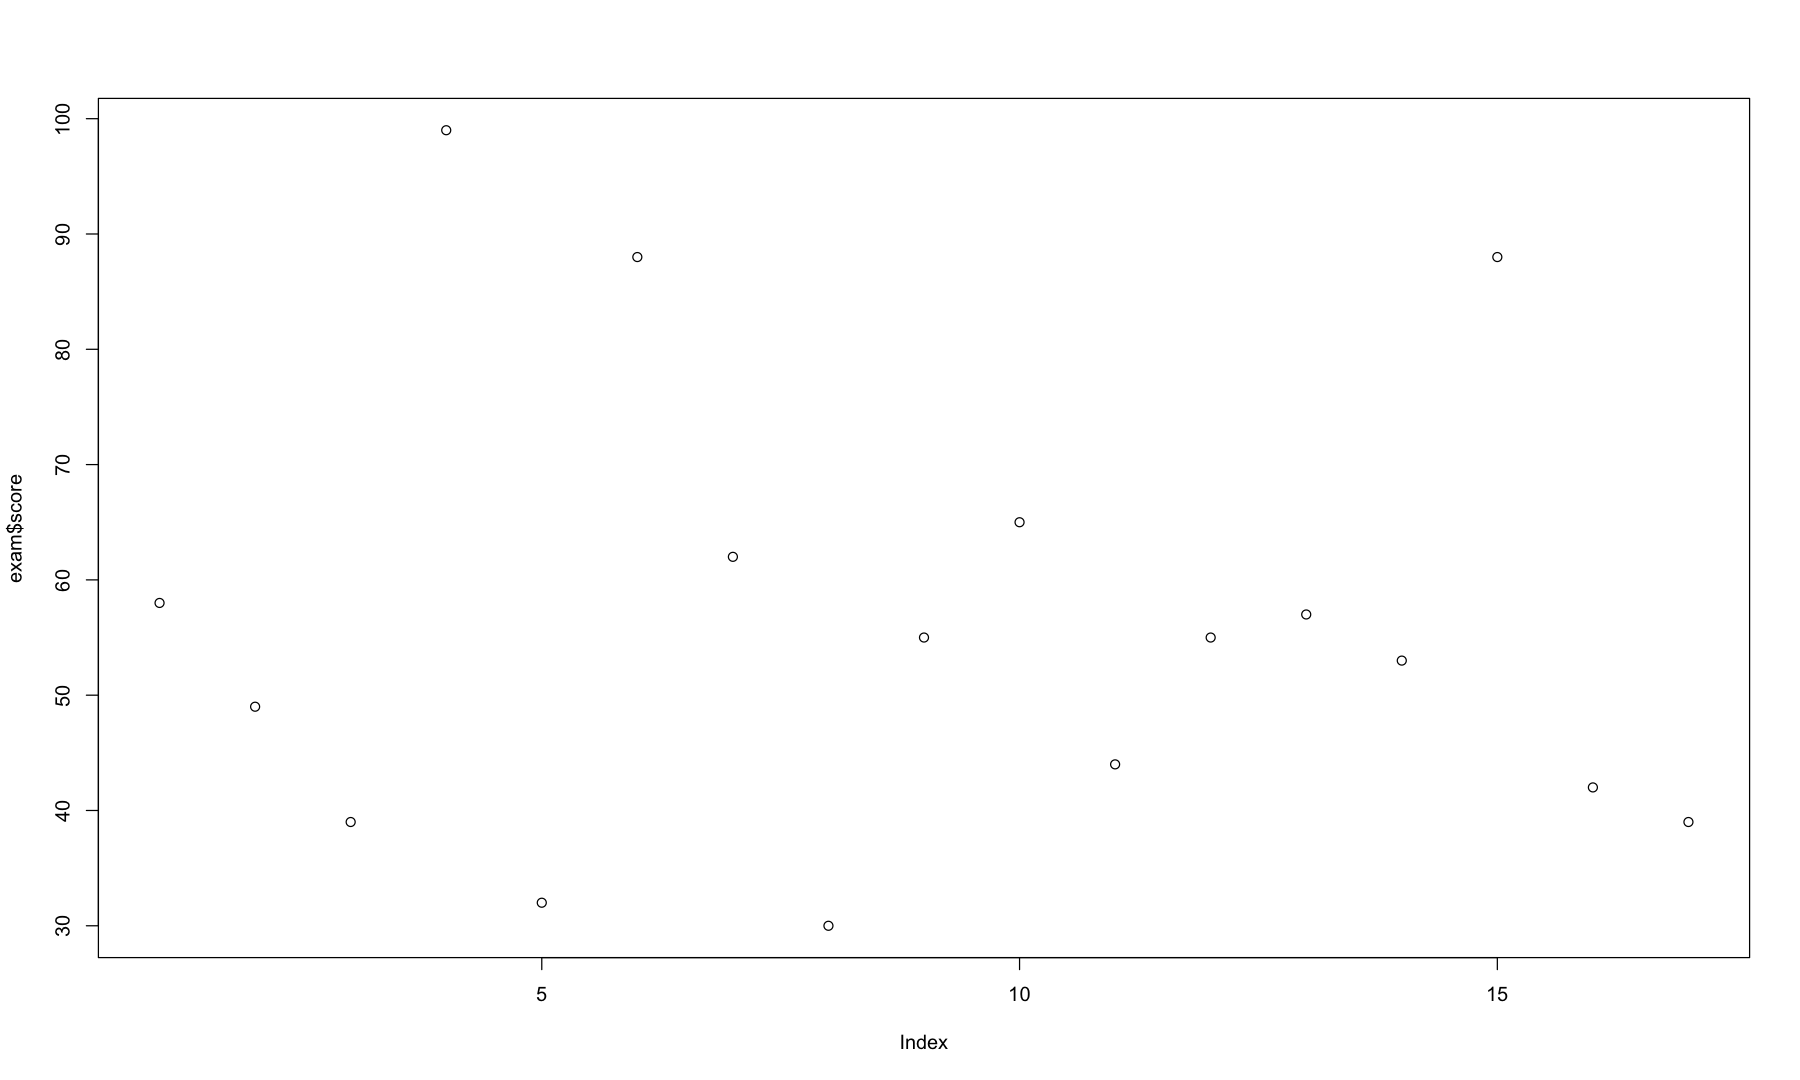

In [26]:
shapiro.test(exam$score)
# t-검정
t.test(exam$score,mu=55,alternative = "greater") #데이터가 평균보다 큰지(성적이 올랐는지)를 확인하는것이기 때문에 그레이터를 사용.
# 평균은 56으로 올랏는데 왜 p-value가 0.40이라 귀무가설인가? ==  이상치가 존재.값보다 큰게 하나 존재하기 때문에, 통계에서 뺀다.
# inf라는 값이 있으면. 이상치혹은 특이치가 있다는 소리.

par(bg='white')
plot(exam$score)

p-value = 0.1058 > 0.05 --> 귀무가설
W = 0.91143값이 1에 가까울수록 정규성에 가깝다.
p-value = 0.4046 > 0.05 --> 귀무가설


	Shapiro-Wilk normality test

data:  pre
W = 0.9624, p-value = 0.8129



	Shapiro-Wilk normality test

data:  post
W = 0.94815, p-value = 0.6467


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.600   8.975  10.750  10.630  12.625  14.300 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.400   9.425  11.250  11.040  13.150  14.200 


	Welch Two Sample t-test

data:  pre and post
t = -0.36891, df = 17.987, p-value = 0.7165
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.745046  1.925046
sample estimates:
mean of x mean of y 
    10.63     11.04 


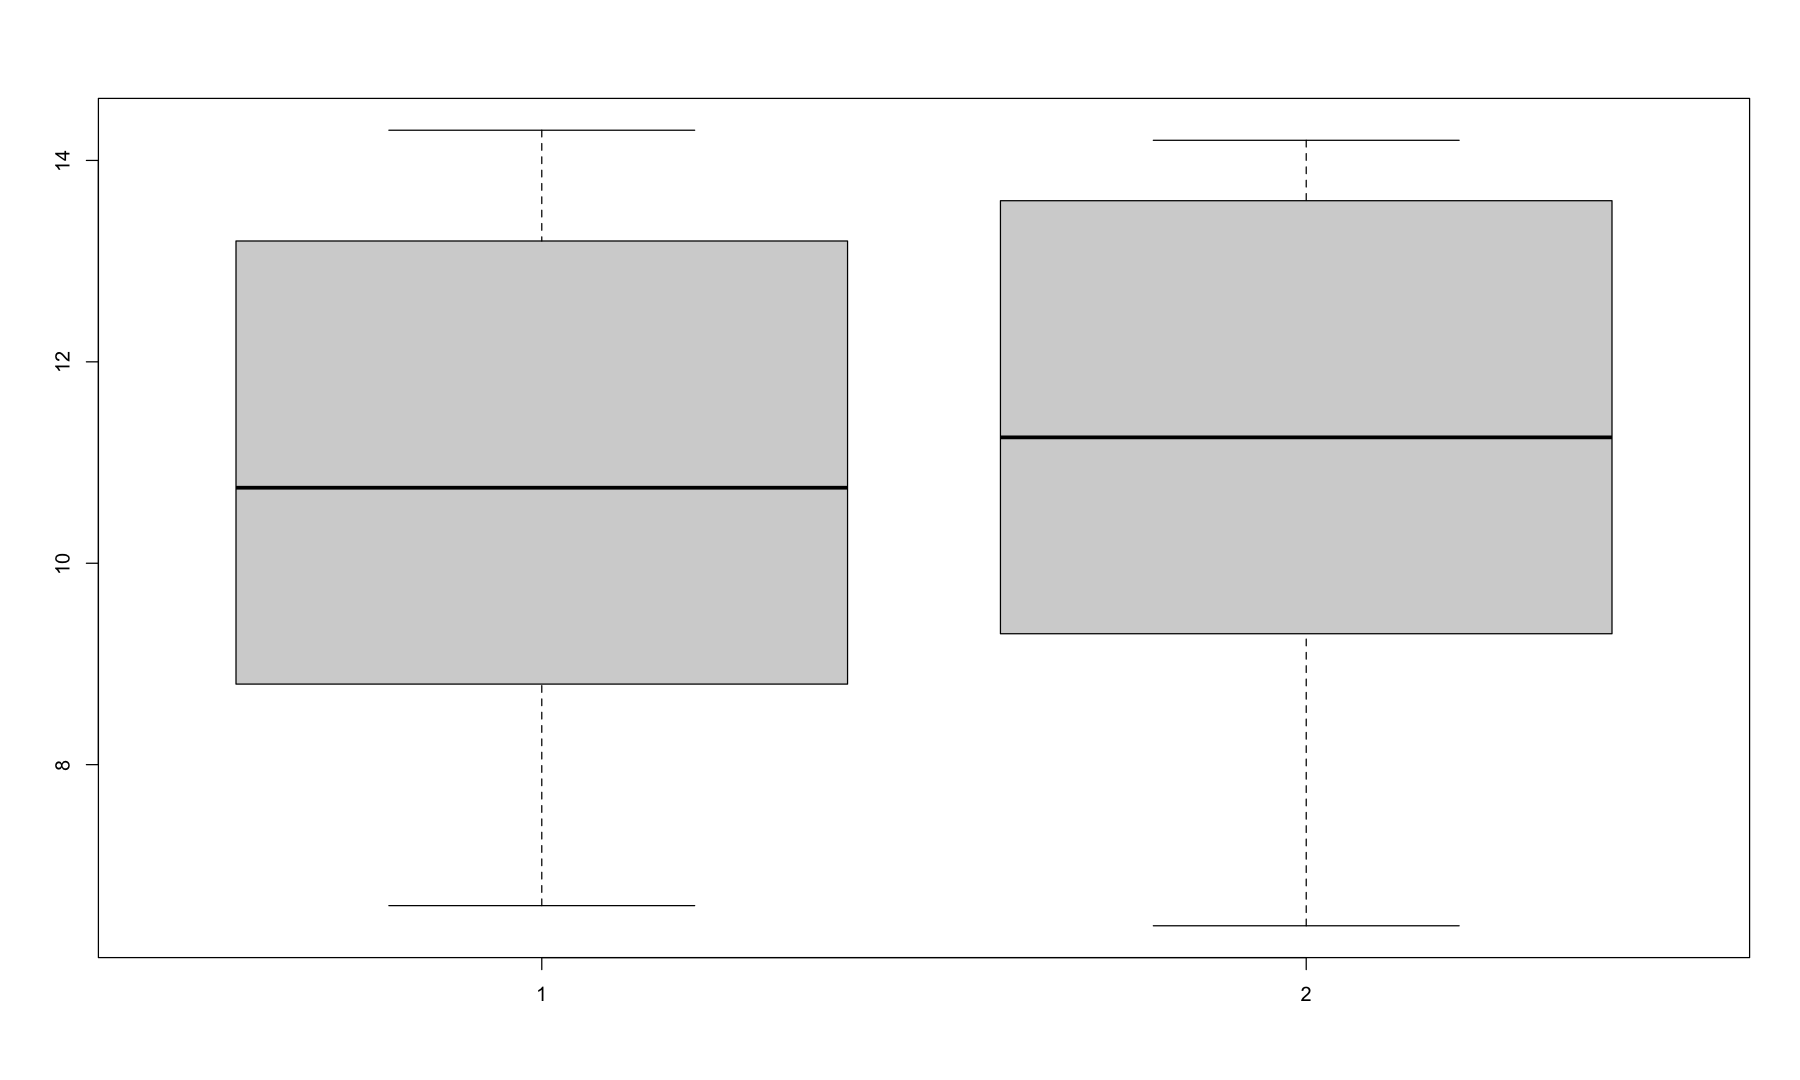

In [38]:
# 표본이 2개인 t검정
# 귀무가설: 복용 전후의 차이가 없다.
# 대립가설: 복용 젆의 차이가 있다.

preMedicine <- read.csv("./Data/preMedicine.csv")
postMedicine <- read.csv("./Data/postMedicine.csv")

pre <- preMedicine$data
post <- postMedicine$data

par(bg='white')
boxplot(pre,post)

shapiro.test(pre)
shapiro.test(post)

summary(pre)
summary(post)
t.test(pre,post,alternative = "two.sided")

## 아래 있는 mean은 수학적인 계산. 통계적으로는 mean이 아니다. 그렇기에 아래 mean이랑 위에 p-value랑은 다른값이다. 
# boxplot사용해도 비슷하니까 차이가없는것.




p-value = 0.7165 > 0.05 -> 귀무 가설

# 상관관계

In [47]:
y <- c(1,2,3,4)
z <- c(5,0,9,7)  ## 숫자 위치가 바뀌면 상관관계가 바뀜.
cor(y,z)

[1] 0.5013947

In [48]:
# 피어슨 상관계수
cor(y,z,method = "pearson")
# 스피어맨 상관계수
cor(y,z,method = "spearman")

[1] 0.5013947

[1] 0.6

## 콜모고로프-스미노프 검정(KS Test)
: 주어진 2개의 데이터가 같은 분포를 갖는지를 검정

In [49]:
# 귀무가설 :  두개의 데이터의 분포가 같다.
# 대립가설 :  두개의 데이터의 분포가 다르다.

In [52]:
x <- rnorm(50)
y <- runif(50)
ks.test(x,y)



	Exact two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.5, p-value = 4.808e-06
alternative hypothesis: two-sided


p-value = 4.808e-06 < 0.05  ---> 대립가설

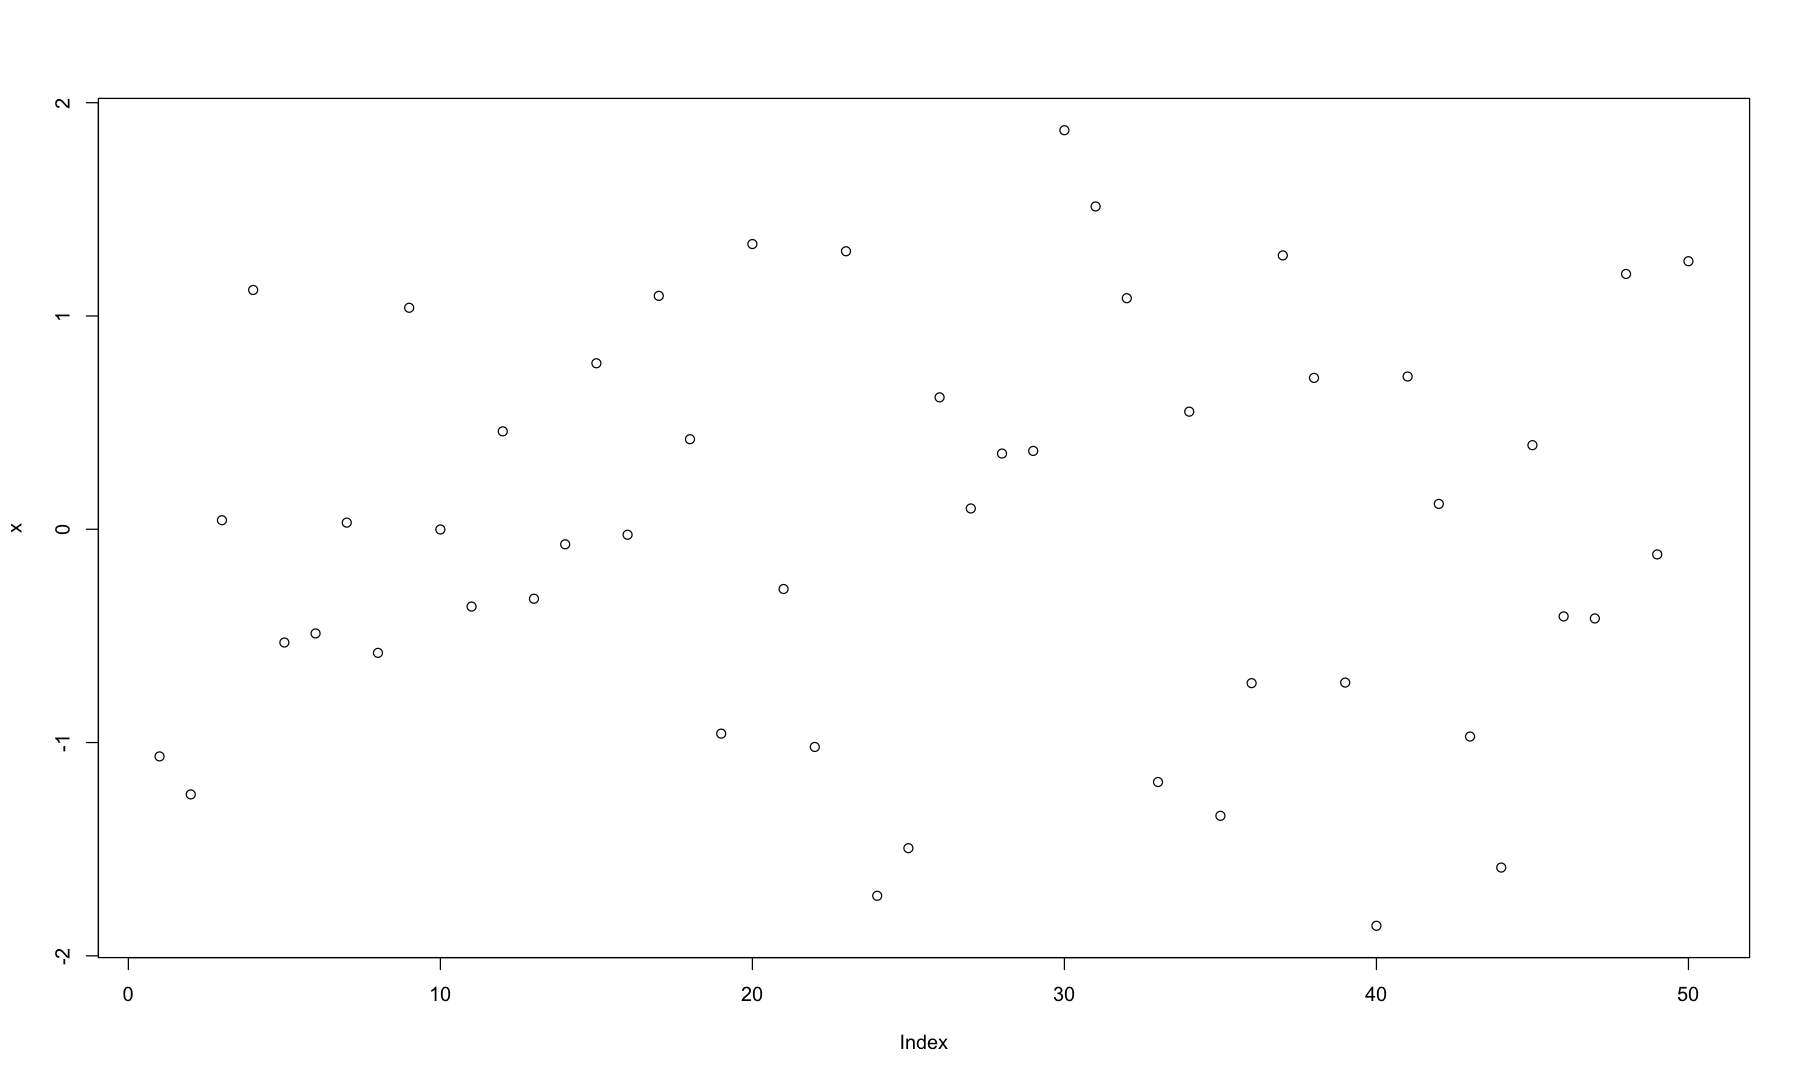

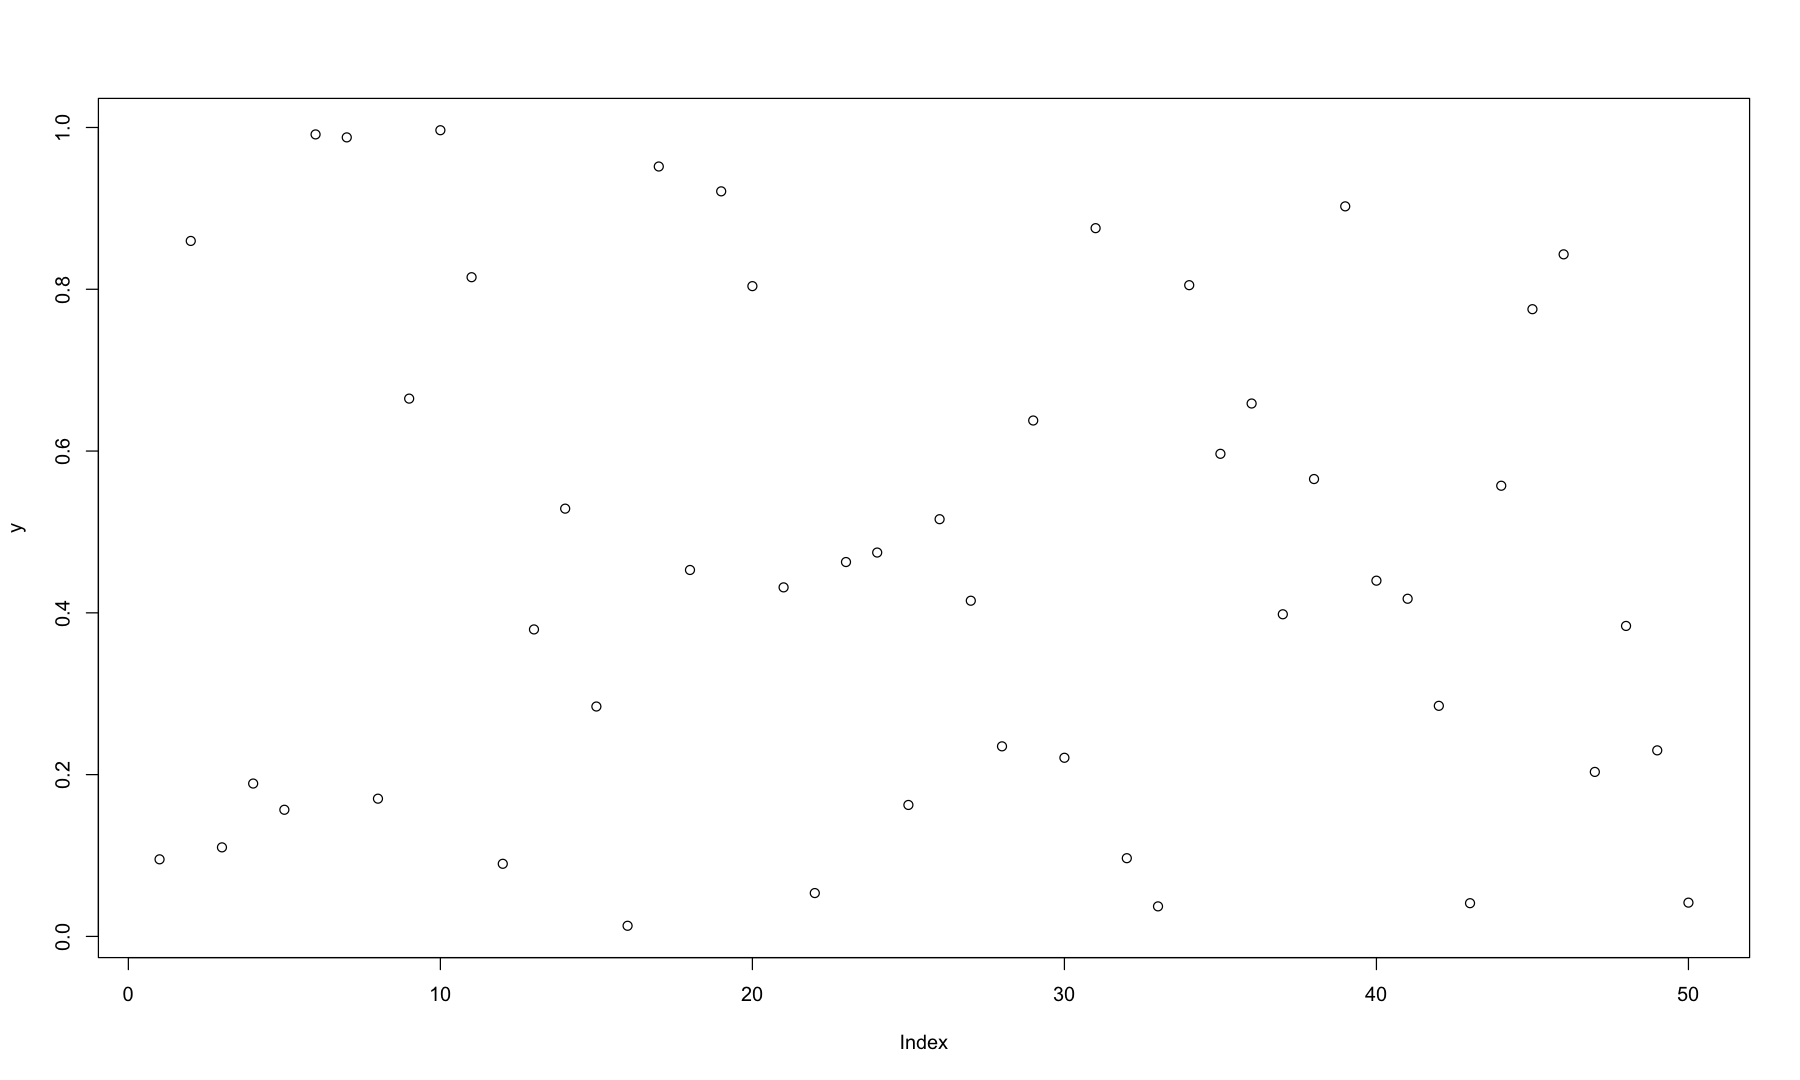

In [54]:
par(bg='white')
plot(x)
plot(y) ## y축범위가 다르기 때문에 대립가설

# 부호검정

In [55]:
#식사전과 식사후의 음료수 맛에 대한 평가
x<-c(4,1,1,4,3,3,2,5,3,3) #전
y<-c(1,1,3,2,5,1,4,4,3,1) #후


In [ ]:
# 귀무가설: 유의한 차이가 없다.
# 대립가설: 유의한 차이가 있다.

In [56]:
binom.test(c(length(x[x>y]),length(y[y>x])))


	Exact binomial test

data:  c(length(x[x > y]), length(y[y > x]))
number of successes = 5, number of trials = 8, p-value = 0.7266
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2448632 0.9147666
sample estimates:
probability of success 
                 0.625 


p-value = 0.7266 > 0.05 -> 귀무가설

# 비율 검정
: 2개의 데이터 사이에 비율의 차이가 있는지를 검정

In [57]:
# 맥주를 좋아하시나요? 라는 질문에 서울에서는 400명중 360명, 부산에서는 200명중 136명이 답함
# 둘의 비율차이가 있다고 할 수 있는가?

# 귀무가설: 유의한 차이가없다
# 대립가설: 유의한 차이가있다.

hite <- c(360,136)
sample <- c(400,200)

prop.test(hite,sample)


	2-sample test for equality of proportions with continuity correction

data:  hite out of sample
X-squared = 43.515, df = 1, p-value = 4.207e-11
alternative hypothesis: two.sided
95 percent confidence interval:
 0.14523 0.29477
sample estimates:
prop 1 prop 2 
  0.90   0.68 


 p-value = 4.207e-11 < 0.05 -> 대립가설